In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.cross_validation import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
from sklearn.linear_model import LinearRegression


c:\python27\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [66]:
read_file = pd.read_excel('./resource/teamproject_data_final2.xlsx', sheetname=0)

df_scale = scale(read_file)
df_data = pd.DataFrame(data = df_scale, columns = read_file.columns)
#print(df_data['accident'], df_scale[:,-1:])


In [67]:
# 상관관계 구하기
df_data.corr()

,taxi_driver,gasolin,Diesel,LPG,days,temp,temp_max,temp_min,temp_dif,rainfall,...,wind_spd_max,rainfall_day,frost,fog,snow,yellow_sand,thunderbolts,weather_condition,weather_condition_per,accident
taxi_driver,1.000000,0.258317,-0.661356,0.585410,-0.036201,-0.155122,-0.177813,-0.140393,-0.291387,0.094857,...,0.007892,0.029539,0.099248,0.325565,0.093486,0.047121,-0.019145,0.161979,0.164219,0.012534
gasolin,0.258317,1.000000,0.006089,0.179048,0.538406,0.256115,0.229540,0.272122,-0.314302,0.354521,...,0.106043,0.438033,-0.175738,-0.015357,-0.086810,0.088988,0.407978,0.278796,0.235423,0.444243
Diesel,-0.661356,0.006089,1.000000,-0.129780,0.116494,0.057103,0.075020,0.041292,0.259224,-0.186875,...,-0.112998,-0.081626,-0.068663,-0.076501,-0.061794,0.063752,-0.021728,-0.117976,-0.125875,0.169474
LPG,0.585410,0.179048,-0.129780,1.000000,0.085074,-0.124291,-0.141105,-0.111883,-0.227640,0.038261,...,-0.142401,-0.025598,0.108955,0.360786,0.087273,0.089099,-0.009557,0.148416,0.141511,0.032250
days,-0.036201,0.538406,0.116494,0.085074,1.000000,0.203623,0.197638,0.204665,-0.045476,0.165955,...,0.003186,0.242932,-0.226435,-0.000456,-0.073754,0.083821,0.205796,0.073606,-0.002432,0.463184
temp,-0.155122,0.256115,0.057103,-0.124291,0.203623,1.000000,0.997436,0.998084,0.034967,0.538606,...,0.086128,0.498005,-0.778069,-0.022473,-0.794973,-0.277023,0.611669,-0.304992,-0.324444,0.578441
temp_max,-0.177813,0.229540,0.075020,-0.141105,0.197638,0.997436,1.000000,0.991395,0.105360,0.504436,...,0.088679,0.456319,-0.787340,-0.042477,-0.812486,-0.255428,0.587829,-0.348698,-0.367604,0.583627
temp_min,-0.140393,0.272122,0.041292,-0.111883,0.204665,0.998084,0.991395,1.000000,-0.025720,0.567523,...,0.085419,0.531171,-0.765405,-0.010070,-0.778000,-0.295539,0.630830,-0.266795,-0.286407,0.566809
temp_dif,-0.291387,-0.314302,0.259224,-0.227640,-0.045476,0.034967,0.105360,-0.025720,1.000000,-0.459086,...,0.028319,-0.550389,-0.198123,-0.247889,-0.294473,0.294499,-0.303162,-0.636148,-0.631540,0.151102
rainfall,0.094857,0.354521,-0.186875,0.038261,0.165955,0.538606,0.504436,0.567523,-0.459086,1.000000,...,0.309308,0.772714,-0.361192,0.212964,-0.317855,-0.232681,0.673137,0.344366,0.328623,0.232430


In [68]:
df_cons = sm.add_constant(df_data.ix[:,:-1])
df_y    = pd.DataFrame(data = df_scale[:,-1:], columns = ['accident/day'])


In [69]:
model = sm.OLS(df_y, df_cons)
result_model = model.fit()
print(result_model.summary())

                            OLS Regression Results                            
Dep. Variable:           accident/day   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     6.720
Date:                Fri, 28 Oct 2016   Prob (F-statistic):           2.71e-10
Time:                        14:26:50   Log-Likelihood:                -83.083
No. Observations:                  96   AIC:                             212.2
Df Residuals:                      73   BIC:                             271.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
const                  3.855e-

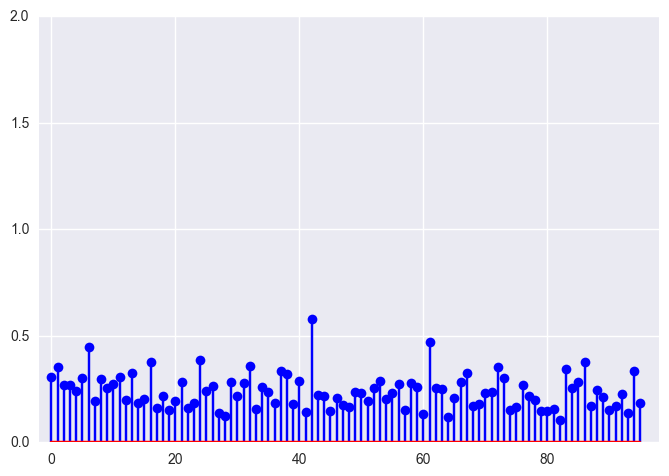

('hat.sum() =', 23.000000000000007)


In [70]:
influence = result_model.get_influence()
hat = influence.hat_matrix_diag
plt.stem(hat)
plt.axis([ -2, len(df_y)+2, 0, 2 ])
plt.show()
print("hat.sum() =", hat.sum())

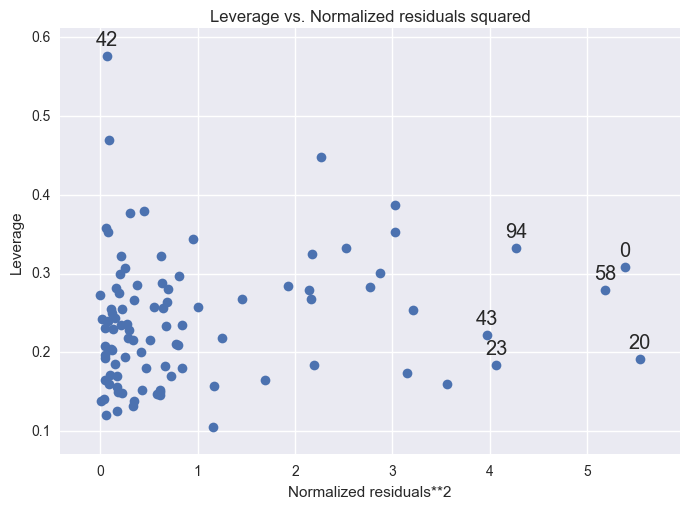

In [71]:
#레버리지
sm.graphics.plot_leverage_resid2(result_model)
plt.show()

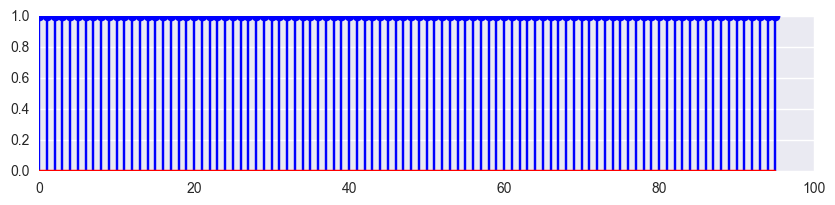

In [72]:
#아웃라이어
plt.figure(figsize=(10, 2))
plt.stem(result_model.outlier_test().ix[:, -1])
plt.show()

In [73]:

#df_PCA = PCA(5).fit_transform(df_data.ix[:, :-1])


pca = PCA(n_components=5)
pca_data = pca.fit(df_data.ix[:, :-1])

pca_ratio_idx = pca_data.explained_variance_ratio_

total_ratio = 0
for i in pca_ratio_idx :
    total_ratio += i

print(total_ratio)

#transform
pca_data_t= pca_data.transform(df_data.ix[:, :-1])
#print(pca_data_t)



pca.components_.T.shape

0.780275373455


(24, 5)

In [74]:
new = pd.DataFrame(pca.components_.T, columns = ['x1', 'x2', 'x3', 'x4', 'x5'], index=df_data.ix[:,:-1].columns)
new

,x1,x2,x3,x4,x5
taxi_driver,-0.023143,-0.174404,0.420120,-0.451007,0.043443
gasolin,0.148315,-0.129176,0.047195,-0.132883,-0.510654
Diesel,0.005884,0.121972,-0.194715,0.428985,-0.346064
LPG,-0.019517,-0.138607,0.415761,-0.232618,-0.207211
days,0.100284,-0.012795,-0.054420,-0.072048,-0.597759
temp,0.317769,0.165576,0.017572,-0.052236,0.022416
temp_max,0.308496,0.189802,0.006235,-0.062676,0.017553
temp_min,0.324420,0.144619,0.023526,-0.041882,0.031042
temp_dif,-0.108630,0.350835,-0.131105,-0.160472,-0.101774
rainfall,0.269929,-0.159150,-0.066985,-0.091727,0.110208


In [75]:
#df_data1 = pd.DataFrame(data = df_PCA, columns = read_file.columns[0:14])
df_data1 = pd.DataFrame(data = pca_data_t, columns = ['x1', 'x2', 'x3', 'x4', 'x5'])
#df_data1 = pd.DataFrame(data = pca_data_t , columns=read_file.columns[:-1])
#df_cons = sm.add_constant(df_data1) # acciendt 값은 포함안됨
df_y    = pd.DataFrame(data = df_scale[:,-1:], columns = ['accident/day'])    


In [76]:
#model_diabetes2 = sm.OLS(df_diabetes.ix[:, -1], df_diabetes.ix[:, :-1])

model = sm.OLS(df_y, df_data1)
result_model = model.fit()
print(result_model.summary())

                            OLS Regression Results                            
Dep. Variable:           accident/day   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     21.89
Date:                Fri, 28 Oct 2016   Prob (F-statistic):           2.48e-14
Time:                        14:27:19   Log-Likelihood:                -98.315
No. Observations:                  96   AIC:                             206.6
Df Residuals:                      91   BIC:                             219.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.1951      0.025      7.842      0.0

In [77]:
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.linear_model     import LinearRegression

model = LinearRegression()

x = df_data1.values
y = df_y.values.flatten()

cv = KFold(len(y), 5)
cross_val_score(model, x, y , "r2", cv).mean()

0.16201241717493975

In [ ]:
# 다항회귀

In [78]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model  import LinearRegression
from sklearn.pipeline      import Pipeline

In [79]:
df_data1.values[0]

array([-3.40483691, -1.57688236,  2.54445906,  0.97208024, -1.12146619])

In [82]:
model = LinearRegression()
X     = df_data1.values
y     = df_y.values
model.fit(X,y)
 
model.predict(df_data1.values[0])

c:\python27\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[-0.44742896]])

In [81]:
df_y

,accident/day
0,-2.487701
1,-2.620880
2,-0.771173
3,-0.158551
4,1.158440
5,1.356729
6,1.501746
7,0.676037
8,0.249865
9,0.702673
